In [21]:
#define all relevant functions
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

In [22]:
def read_data(file_name):
    """Reads and processes data from a given file, correctly handling filenames with 'ffX'."""
    data = []
    
    with open(file_name, 'r') as f:
        for line in f:
            l = line.split()
            
            if len(l) != 4:
                continue  # Skip lines that do not match expected format
            
            try:
                # Extract the filename and split into parts
                file_parts = l[0].split("/")[-1].split("_")

                # Remove any "ffX" component
                file_parts = [part for part in file_parts if not (part.startswith("ff") and part[2:].isdigit())]

                # Extract only the LAST 4 elements (since the earlier ones are not needed)
                U = float(file_parts[-4])   # Extracts U parameter
                J = float(file_parts[-3])   # Extracts J parameter
                nk = int(file_parts[-2])    # Extracts nk number points
                nkf = int(file_parts[-1].split(".")[0])  # Extracts nkf number points

                Tc = l[1]  # Tc value
                phase = float(l[2])  # Dominant phase
                
                # Extract time in seconds
                time_parts = l[3].split("m")
                seconds = float(time_parts[0]) * 60 + float(time_parts[1].split("s")[0])
                
                # Store data as a LIST (not dictionary)
                final_data = [U, J, nk, nkf, Tc, phase, seconds]
                data.append(final_data)
            
            except (ValueError, IndexError) as e:
                print(f"Skipping line due to error: {line.strip()} - {e}")
    
    return data



In [23]:
def tc_plots(datas,U):

    nplots = len(datas)
    fig, axs = plt.subplots(1, nplots, figsize=(20, 8))
    fig.suptitle(r"Tc as a function of chemical potential $\mu$ for U =10, for different t' hopping parameters", fontsize = 18)
    plt.subplots_adjust(wspace=0.5)

    for index, data1 in enumerate(datas):

        data = read_data(data1)
        groundstate = []
        Us = []
        mu = []
        points = []
        tc = []
        nk =[]
        nkf = []
        times = []
        for d in data:
            if d[0] == U:

                Us.append(d[0])
                mu.append(d[1])
                points.append([d[2],d[3]])  #nk, nkf vector
                groundstate.append(d[4])  #Stores GS
                nk.append(d[2])
                nkf.append(d[3])
                tc.append(d[5])  #stores Tc
                times.append(d[6])


        

        color_map = {
            "SC": "#A7C7E7",
            "CDW": "#FFB347",
            "FL": "black",
            "SDW": "#B0E57C"
        }

        labels_added = {}

        for i in range(len(Us)):
            state = groundstate[i]
            colour = color_map.get(state, "white")

        # Add label only if it hasn't been added before
            label = state if state not in labels_added else None
            labels_added[state] = True  # Mark l abel as used
            axs[index].scatter(mu[i], tc[i], c=colour, s=100, marker="o")
        
            labels_added = {}

                # Legend
        legend_patches = [mpatches.Patch(color=color, label=phase) for phase, color in color_map.items() if phase != "Empty"]
        paired = sorted(zip(mu, tc))  # Pair elements and sort by the first array
        arr1_sorted, arr2_sorted = zip(*paired)  # Unzip the sorted pairs
        mu, tc =  list(arr1_sorted), list(arr2_sorted)
        axs[index].plot(mu, tc, ls = "--", color = "grey", label = "t' =0.25")

    # Add the legend to the plot
        axs[7].legend(handles=legend_patches, title="Phase", loc="upper right", fontsize=10)
        axs[7].legend(handles=legend_patches, title="Phase", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

        tprime = (index) * 0.1

       # axs[index].legend()
        axs[index].set_title(f"t' = {tprime:.1f}")
        axs[index].set_xlabel(r"$\mu$(eV)")
        axs[0].set_ylabel("Tc (eV)")
        axs[index].grid()


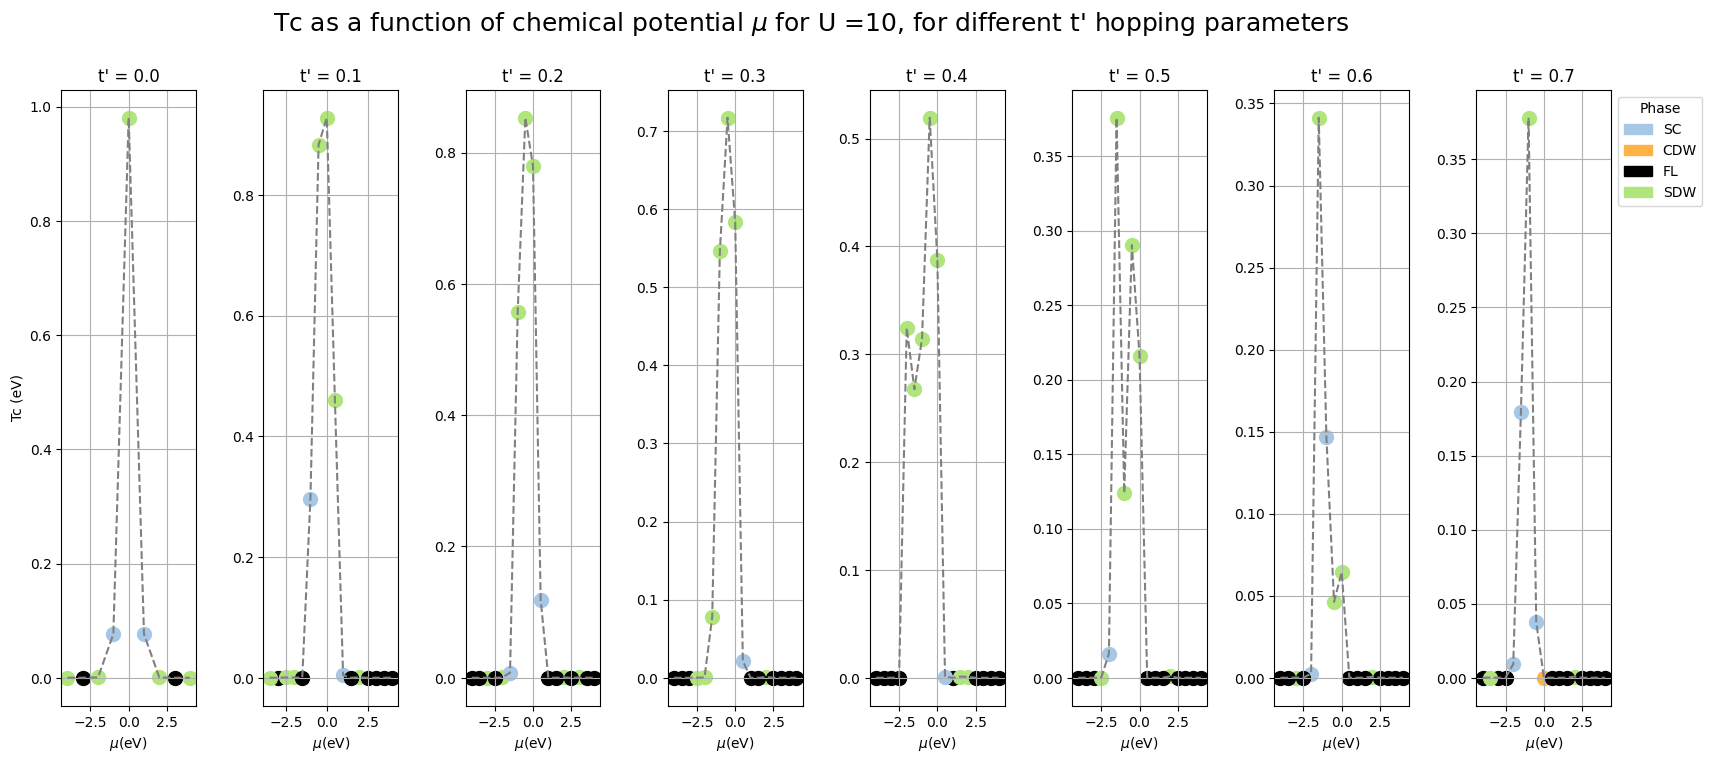

In [24]:
datas = [ "1NNN_0.log","1NNN_1.log", "1NNN_2.log", "1NNN_3.log", "1NNN_4.log", "1NNN_5.log", "1NNN_6.log", "1NNN_7.log"]


tc_plots(datas, 10)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def tc_plots(datas, U):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    color_map = {
        "SC": "#A7C7E7",
        "CDW": "#FFB347",
        "FL": "black",
        "SDW": "#B0E57C"
    }

    colors = ['#A7C7E7', '#B0E57C', '#FDFD96', '#FFB347', '#FFB6C1', '#D8BFD8', '#FF6961', '#AEC6CF']
    t_prime_lines = []
    
    for index, data1 in enumerate(datas):
        data = read_data(data1)  # Ensure this function is defined
        mu, tc, groundstate = [], [], []
        
        for d in data:
            if d[0] == U:
                mu.append(d[1])
                tc.append(d[5])  # Tc values
                groundstate.append(d[4])  # Ground state
        
        max_tc = np.max(tc) 

       
        
        tc_i = []
        for i in range(len(mu)):
            state = groundstate[i]
            colour = color_map.get(state, "white")
            ax.scatter(mu[i], tc[i]/max_tc + index*2   , c=[colour], s=120, marker="o")  # Small offset for visibility
            tc_i.append(tc[i]/max_tc  + index*2 )

         # Ensure both lists have the same length


        paired = sorted(zip(mu, tc_i))  # Pair elements and sort by the first array
        arr1_sorted, arr2_sorted = zip(*paired)  # Unzip the sorted pairs
        mu, tc_i =  list(arr1_sorted), list(arr2_sorted)

        ax.axhline( 0.00 + index*2, color = 'black', ls = '--')
        
        line, = ax.plot(mu, tc_i, ls="--", label=f"t' = {index * 0.1:.1f}", color = colors[index])
        label_x = mu[-2]  # Position the label in the middle of the x-axis
        label_y = tc_i[-2] + 0.5  # Position the label in the middle of the curve
    
        ax.text(3.5, label_y + 0.1, f"t' = {index * 0.1:.1f}", color= "black", fontsize=18, ha='center')

        t_prime_lines.append(line)  # Add the line to the t' legend

    # First Legend for Phases
    legend_patches = [mpatches.Patch(color=color, label=phase) for phase, color in color_map.items()]
   # ax.legend(handles=legend_patches, title="Phase", loc="upper right", fontsize=10)

    # Second Legend for t' values
   # ax.legend(handles=t_prime_lines, title="t' Values", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
    
    ax.set_xlabel(r"$\mu$(eV)", fontsize = 25)
    ax.set_ylabel(" Normalised Tc (eV)", fontsize = 25)
    #ax.set_title(" Tc as a function of $\mu$ for U=10.00eV", fontsize = 25)
    ax.grid()
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=16)
    plt.show()
   # Ensure this return a valid result


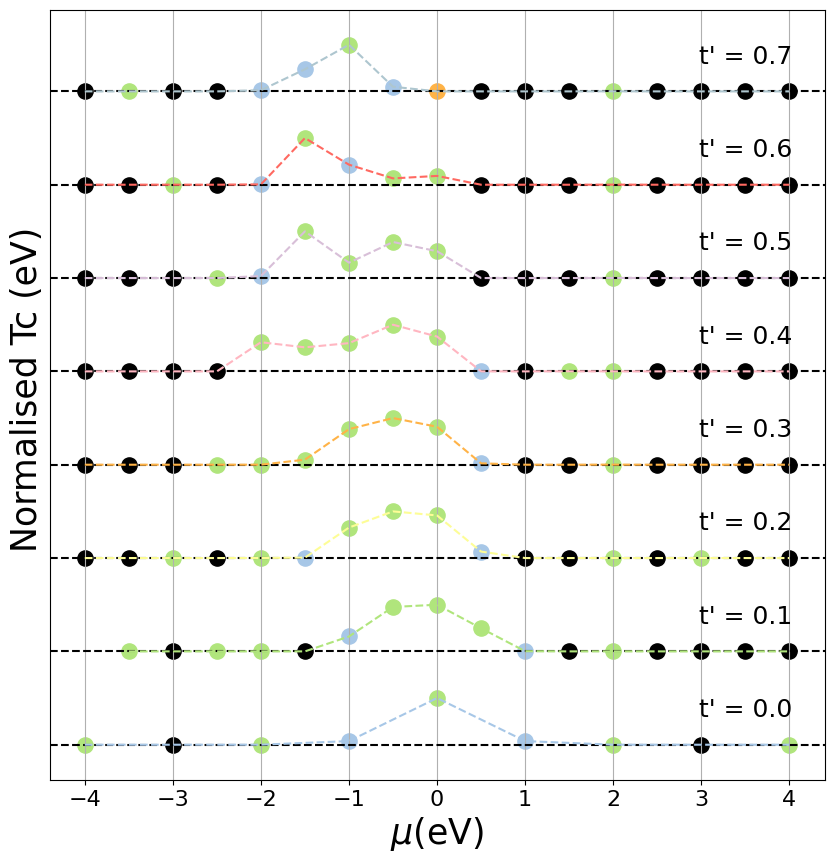

In [26]:
datas = [ "1NNN_0.log","1NNN_1.log", "1NNN_2.log", "1NNN_3.log", "1NNN_4.log", "1NNN_5.log", "1NNN_6.log", "1NNN_7.log"]


tc_plots(datas, 10)

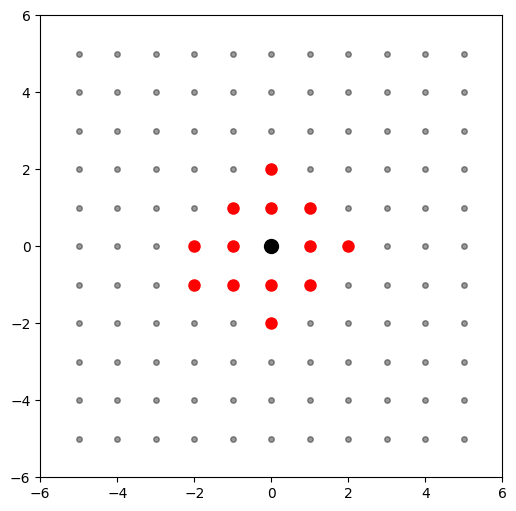

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lattice(num_bonds, grid_size=5):
    """
    Plot a square lattice highlighting the closest 'num_bonds' neighbors.

    Args:
        num_bonds: number of neighboring sites to highlight
        grid_size: half-size of the grid (default 5 => grid from -5 to +5)
    """
    # Create a list of all sites (excluding the central site at (0,0))
    sites = []
    for x in range(-grid_size, grid_size + 1):
        for y in range(-grid_size, grid_size + 1):
            if (x, y) != (0, 0):
                dist = np.sqrt(x**2 + y**2)
                sites.append((dist, (x, y)))

    # Sort by distance to (0,0)
    sites.sort()

    # Pick the num_bonds closest sites
    chosen_sites = [pos for _, pos in sites[:num_bonds]]

    # Now plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.set_xlim(-grid_size-1, grid_size+1)
    ax.set_ylim(-grid_size-1, grid_size+1)

    # Plot all sites
    for x in range(-grid_size, grid_size + 1):
        for y in range(-grid_size, grid_size + 1):
            if (x, y) == (0, 0):
                ax.plot(x, y, 'ko', markersize=10)  # Black central atom
            elif (x, y) in chosen_sites:
                ax.plot(x, y, 'ro', markersize=8)   # Red neighboring atoms
            else:
                ax.plot(x, y, 'ko', markersize=4, alpha=0.4)  # Faint grey/black for others

    #ax.grid(True, which='both', linestyle='--', alpha=0.5)
    #ax.set_xticks(range(-grid_size, grid_size+1))
    #x.set_yticks(range(-grid_size, grid_size+1))
    #plt.xticks(fontsize=18)
    #plt.yticks(fontsize=18)
    #plt.title(f"Square lattice: {num_bonds} closest bonds highlighted", fontsize=14)
    plt.show()

# Example usage:
plot_lattice(num_bonds=13)


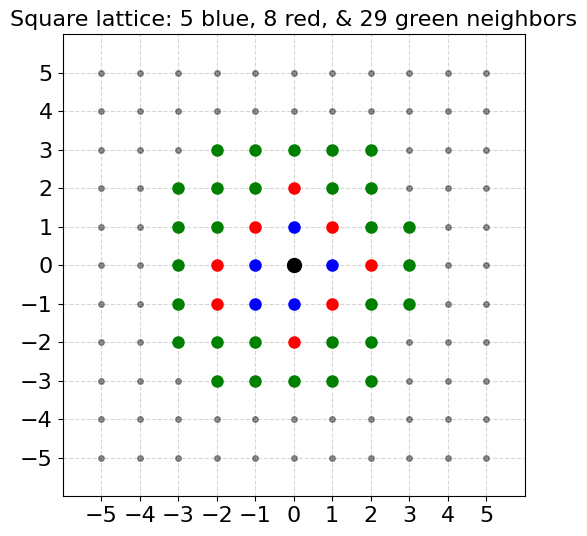

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lattice(num_bonds_blue, num_bonds_red, num_bonds_green, grid_size=5, tick_fontsize=14):
    """
    Plot a square lattice highlighting the first 'num_bonds_blue' neighbors in blue,
    the next 'num_bonds_red' neighbors in red, and the next 'num_bonds_green' neighbors in green.

    Args:
        num_bonds_blue: number of neighboring sites to highlight in blue
        num_bonds_red: number of neighboring sites to highlight in red
        num_bonds_green: number of neighboring sites to highlight in green
        grid_size: half-size of the grid (default 5 => grid from -5 to +5)
        tick_fontsize: font size for axis tick labels
    """
    # Create a list of all sites (excluding the central site at (0,0))
    sites = []
    for x in range(-grid_size, grid_size + 1):
        for y in range(-grid_size, grid_size + 1):
            if (x, y) != (0, 0):
                dist = np.sqrt(x**2 + y**2)
                sites.append((dist, (x, y)))

    # Sort by distance to (0,0)
    sites.sort()

    # Pick the num_bonds_blue closest sites (first N blue)
    chosen_sites_blue = [pos for _, pos in sites[:num_bonds_blue]]

    # Pick the next num_bonds_red sites (next N red)
    chosen_sites_red = [pos for _, pos in sites[num_bonds_blue:num_bonds_blue + num_bonds_red]]

    # Pick the next num_bonds_green sites (next N green)
    chosen_sites_green = [pos for _, pos in sites[num_bonds_blue + num_bonds_red:num_bonds_blue + num_bonds_red + num_bonds_green]]

    # Now plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.set_xlim(-grid_size-1, grid_size+1)
    ax.set_ylim(-grid_size-1, grid_size+1)

    # Plot all sites
    for x in range(-grid_size, grid_size + 1):
        for y in range(-grid_size, grid_size + 1):
            if (x, y) == (0, 0):
                ax.plot(x, y, 'ko', markersize=10)  # Black central atom
            elif (x, y) in chosen_sites_blue:
                ax.plot(x, y, 'bo', markersize=8)   # Blue neighboring atoms
            elif (x, y) in chosen_sites_red:
                ax.plot(x, y, 'ro', markersize=8)   # Red neighboring atoms
            elif (x, y) in chosen_sites_green:
                ax.plot(x, y, 'go', markersize=8)   # Green neighboring atoms
            else:
                ax.plot(x, y, 'ko', markersize=4, alpha=0.4)  # Faint grey/black for others

    ax.grid(True, which='both', linestyle='--', alpha=0.5)
    ax.set_xticks(range(-grid_size, grid_size+1))
    ax.set_yticks(range(-grid_size, grid_size+1))
    
    # Set bigger font size for tick labels
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    plt.title(f"Square lattice: {num_bonds_blue} blue, {num_bonds_red} red, & {num_bonds_green} green neighbors", fontsize=16)
    plt.show()

# Example usage:
plot_lattice(num_bonds_blue=5, num_bonds_red=8, num_bonds_green=29, tick_fontsize=16)


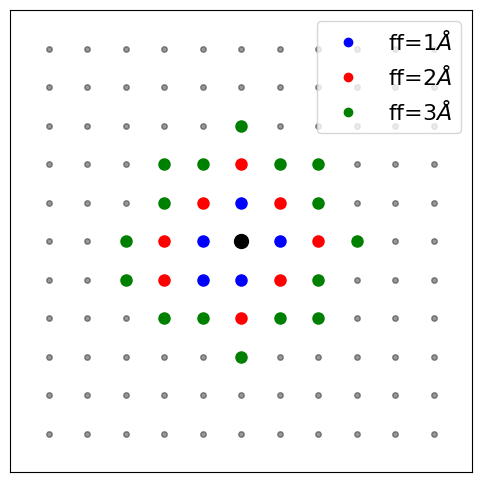

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lattice(num_bonds_blue, num_bonds_red, num_bonds_green, grid_size=5, tick_fontsize=14):
    """
    Plot a square lattice highlighting the first 'num_bonds_blue' neighbors in blue,
    the next 'num_bonds_red' neighbors in red, and the next 'num_bonds_green' neighbors in green.

    Args:
        num_bonds_blue: number of neighboring sites to highlight in blue
        num_bonds_red: number of neighboring sites to highlight in red
        num_bonds_green: number of neighboring sites to highlight in green
        grid_size: half-size of the grid (default 5 => grid from -5 to +5)
        tick_fontsize: font size for axis tick labels
    """
    # Create a list of all sites (excluding the central site at (0,0))
    sites = []
    for x in range(-grid_size, grid_size + 1):
        for y in range(-grid_size, grid_size + 1):
            if (x, y) != (0, 0):
                dist = np.sqrt(x**2 + y**2)
                sites.append((dist, (x, y)))

    # Sort by distance to (0,0)
    sites.sort()

    # Pick the num_bonds_blue closest sites (first N blue)
    chosen_sites_blue = [pos for _, pos in sites[:num_bonds_blue]]

    # Pick the next num_bonds_red sites (next N red)
    chosen_sites_red = [pos for _, pos in sites[num_bonds_blue:num_bonds_blue + num_bonds_red]]

    # Pick the next num_bonds_green sites (next N green)
    chosen_sites_green = [pos for _, pos in sites[num_bonds_blue + num_bonds_red:num_bonds_blue + num_bonds_red + num_bonds_green]]

    # Now plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.set_xlim(-grid_size-1, grid_size+1)
    ax.set_ylim(-grid_size-1, grid_size+1)

    # Plot all sites
    for x in range(-grid_size, grid_size + 1):
        for y in range(-grid_size, grid_size + 1):
            if (x, y) == (0, 0):
                ax.plot(x, y, 'ko', markersize=10)  # Black central atom
            elif (x, y) in chosen_sites_blue:
                ax.plot(x, y, 'bo', markersize=8)   # Blue neighboring atoms
            elif (x, y) in chosen_sites_red:
                ax.plot(x, y, 'ro', markersize=8)   # Red neighboring atoms
            elif (x, y) in chosen_sites_green:
                ax.plot(x, y, 'go', markersize=8)   # Green neighboring atoms
            else:
                ax.plot(x, y, 'ko', markersize=4, alpha=0.4)  # Faint grey/black for others

  

    
    ax.plot([], [], 'bo', label=r'ff=1$\AA$')
    ax.plot([], [], 'ro', label=r'ff=2$\AA$')
    ax.plot([], [], 'go', label=r'ff=3$\AA$')
    
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])

    # Show legend
    plt.legend(loc = 'upper right', fontsize=16)

    #plt.title(f"Square lattice: {num_bonds_blue} blue, {num_bonds_red} red, & {num_bonds_green} green neighbors", fontsize=16)
    plt.show()

# Example usage:
plot_lattice(num_bonds_blue=5, num_bonds_red=8, num_bonds_green=16, tick_fontsize=16)
